In [4]:
# to manage state of session
from typing import Annotated 
from typing_extensions import TypedDict


In [5]:
from langchain_community.utilities import ArxivAPIWrapper, WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun

In [8]:
arxiv_wrapper = ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=300)
arxiv_tool = ArxivQueryRun(api_wrapper=arxiv_wrapper)

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars_max=300)
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [11]:
wiki_tool.invoke("who is Donald trump")

"Page: Musicians who oppose Donald Trump's use of their music\nSummary: A major aspect of Donald Trump's presidential election campaigns, in his 2016, 2020 and 2024 campaigns, are his prominent and frequent political rallies. Below are musicians who have voiced opposition to their music being used by "

In [12]:
arxiv_tool.invoke("Attention all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with "

In [13]:
tools = [wiki_tool]

In [15]:
from langgraph.graph.message import add_messages

In [18]:
### Langgraph application
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [19]:
from langgraph.graph import StateGraph,START,END

In [20]:
graph_builder = StateGraph(State)

In [21]:
from langchain_groq import ChatGroq

In [27]:
from dotenv import load_dotenv
load_dotenv()

True

In [32]:
import os
groq_api_key = os.getenv("GROQ_API_KEY")

In [37]:
llm = ChatGroq(groq_api_key= groq_api_key, model_name="Gemma2-9b-It")

In [38]:
llm.invoke("what is genai")

AIMessage(content="GenAI, which stands for **Generative Artificial Intelligence**, is a type of artificial intelligence that focuses on creating new content. \n\nThink of it like this:\n\n* **Traditional AI** is good at analyzing existing data and making predictions based on patterns it finds. \n* **GenAI** takes it a step further by learning the underlying structure and rules of data, and then using that knowledge to generate brand new, original content.\n\n**Here are some examples of what GenAI can do:**\n\n* **Write text:**  \n\nStories, articles, poems, code, scripts, emails, letters, etc.\n\n* **Create images:**  Photos, artwork, illustrations, logos, etc.\n\n* **Compose music:**  Original songs, melodies, soundtracks, etc.\n\n* **Generate videos:**  Animated videos, short films, marketing content, etc.\n\n* **Translate languages:**  Convert text from one language to another.\n* **Summarize text:**  Condense large amounts of text into shorter summaries.\n\n**Some popular GenAI mod

In [40]:
llm_with_tools = llm.bind_tools(tools=tools)

In [41]:
def chatbot(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [42]:
from langgraph.prebuilt import ToolNode,tools_condition

In [43]:
graph_builder.add_node("chatbot",chatbot)
graph_builder.add_edge(START,"chatbot")
tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools",tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition
)

graph_builder.add_edge("tools","chatbot")
graph_builder.add_edge("chatbot",END)

In [44]:
graph = graph_builder.compile()

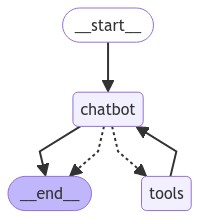

In [45]:
from IPython.display import Image, display
try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [47]:
user_input = "Hi there!, My name is asif"
events = graph.stream(
    {"messages":[("user",user_input)]}, stream_mode = "values"
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name is asif
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_phzg)
 Call ID: call_phzg
  Args:
    query: Asif
================================= Tool Message =================================
Name: wikipedia

Page: Asif
Summary: Asif (Arabic: آصف) is an Arabic masculine given name. In Persian and Urdu it is often pronounced as 'Asif' or 'Asef' though the original form is 'Asaf'. This name referred to Solomon's vizier in the Islamic tradition, and by extension to a wise, prudential figure. It was original
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_age2)
 Call ID: call_age2
  Args:
    query: Solomon's vizier
================================= Tool Message =================================
Name: wikipedia

Page: Asif
Summary: Asif (Arabic: آصف) is an Arabic masculin

In [48]:
user_input = "Hi there!, My name is aamir zamman"
events = graph.stream(
    {"messages":[("user",user_input)]}, stream_mode = "values"
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name is aamir zamman
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_7v5y)
 Call ID: call_7v5y
  Args:
    query: Aamir Zamman
================================= Tool Message =================================
Name: wikipedia

Page: NA-141 Sahiwal-I
Summary: NA-141 Sahiwal-I (این اے-141، ساہِيوال-۱) is a constituency for the National Assembly of Pakistan.
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_pcer)
 Call ID: call_pcer
  Args:
    query: National Assembly of Pakistan
================================= Tool Message =================================
Name: wikipedia

Page: National Assembly of Pakistan
Summary: The National Assembly of Pakistan (Urdu: ایوانِ زیریں, romanized: Aiwān-e-Zairīñ, IPA: [ɛːʋɑːn-e zɛːrĩː ˌpɑːkɪst̪ɑːn], lit. 'Lower house' or Urdu: قومی اسمب

In [49]:
user_input = "Hi there!, My name is aaqil qureshi"
events = graph.stream(
    {"messages":[("user",user_input)]}, stream_mode = "values"
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name is aaqil qureshi
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_rx12)
 Call ID: call_rx12
  Args:
    query: aaqil qureshi
================================= Tool Message =================================
Name: wikipedia

Page: Ahmedpur East
Summary: Ahmedpur East or Ahmedpur Sharqia (احمد پُور شرقیہ), also spelled Ahmadpur, Ahmed Pur or Ahmad Pur, is a city in Bahawalpur District, Punjab province, Pakistan. It is the headquarters of Ahmadpur East Tehsil. It is the 69th largest city of Pakistan according to the 2017 
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_antq)
 Call ID: call_antq
  Args:
    query: aaqil qureshi
================================= Tool Message =================================
Name: wikipedia

Page: Ahmedpur East
Summary: Ahmedpur East or

In [50]:
user_input = "Hi there!, My name imran khan"
events = graph.stream(
    {"messages":[("user",user_input)]}, stream_mode = "values"
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

Hi there!, My name imran khan
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_hbmy)
 Call ID: call_hbmy
  Args:
    query: imran khan
================================= Tool Message =================================
Name: wikipedia

Page: Imran Khan
Summary: Imran Ahmed Khan Niazi (Urdu: عمران احمد خان نیازی , pronounced [ɪmɾaːn ɛɦməd xaːn nɪjaːziː]; born 5 October 1952) is a Pakistani politician and former cricketer who served as the 22nd prime minister of Pakistan from August 2018 until April 2022. He is the founder and forme
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_bwkp)
 Call ID: call_bwkp
  Args:
    query: imran khan cricket career
================================= Tool Message =================================
Name: wikipedia

Page: Family of Imran Khan
Summary: The fa